In [1]:
%cd C:\Users\spenc\Desktop\OpenBCSim\pytorch_extension\openbcsim

C:\Users\spenc\Desktop\OpenBCSim\pytorch_extension\openbcsim


In [8]:
import sys; sys.path.append ('./install') # To find openbcsim extension
import torch
import Transducer, Simulator
import importlib as imp
imp.reload (torch)
imp.reload (Transducer)
imp.reload (Simulator)

tx = Transducer.LinearTransducer (5)
sim = Simulator.Simulator (tx=tx)
print (tx)
print (sim)

LinearTransducer (num_elements=5, width=0.00044, height=0.005, kerf=5e-05, num_sub_x=1, num_sub_y=1, center_frequency=3500000.0, dtype=torch.float32, device='cuda')
Simulator (sampling_frequency=100000000.0, decimation=10, scan_depth=0.09, speed_of_sound=1540, attenuation=0.7, tx=LinearTransducer (num_elements=5, width=0.00044, height=0.005, kerf=5e-05, num_sub_x=1, num_sub_y=1, center_frequency=3500000.0, dtype=torch.float32, device='cuda'), rx=LinearTransducer (num_elements=5, width=0.00044, height=0.005, kerf=5e-05, num_sub_x=1, num_sub_y=1, center_frequency=3500000.0, dtype=torch.float32, device='cuda'))


{'num_elements': 5,
 'num_subelements': 5,
 'subdivision_factor': 1,
 'center_frequency': 3500000.0,
 'dtype': torch.float32,
 'device': 'cuda',
 'tensor_type': tensor([], device='cuda:0'),
 'x': tensor(1.00000e-04 *
        [-9.8000, -4.9000,  0.0000,  4.9000,  9.8000], device='cuda:0'),
 'y': tensor([ 0.,  0.,  0.,  0.,  0.], device='cuda:0'),
 'z': tensor([ 0.,  0.,  0.,  0.,  0.], device='cuda:0'),
 'delay': tensor([ 0.,  0.,  0.,  0.,  0.], device='cuda:0'),
 'apodization': tensor([ 1.,  1.,  1.,  1.,  1.], device='cuda:0'),
 'num_sub_x': 1,
 'num_sub_y': 1,
 'width': 0.00044,
 'height': 0.005,
 'kerf': 5e-05}

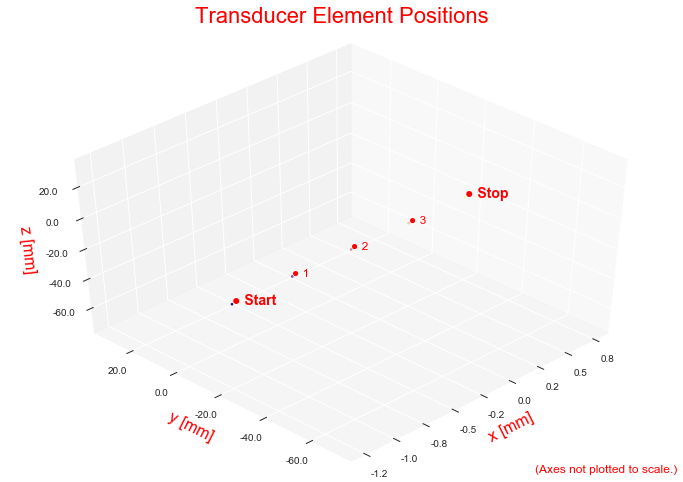

In [9]:
points = [(0, 0, 50e-3)]
from IPython.display import display
display (tx.__dict__)
tx.plot ()

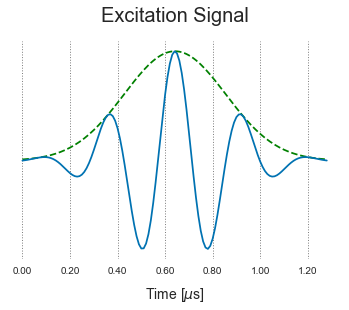

In [33]:
sim.set_gaussian_excitation ()

In [34]:
sim.num_time_samples

11688

In [35]:
from pathlib import Path
data_path = Path ('data/Field II/cyst_phantom/pht_data.mat')
assert data_path.exists ()
sim.load_field_ii_scatterers (f'{data_path}', verbose=True)

Loading Field II scatterer data from data\Field II\cyst_phantom\pht_data.mat
Scatterer data loaded. Total # scatterers: 100,000


In [12]:
sim.stats ();

Output buffer elements     12,856,800      = 2 x [Time samples] x [Receiver subelements] -- `2 x` because data is complex
Time samples               11,688         
Transmitter subelements    550            
Receiver subelements       550            
Scatterer samples          100,000        
CUDA threads               30,356,480,000  = 1024 * ceil([Scatterer samples] / 1024) x [Transmitter subelements] x [Receiver subelements]
CUDA blocks                29,541,015      = [CUDA threads] / 1024    


In [13]:
result = sim.launch ()
print (result.shape)
print (result)
del result

244.4 seconds
torch.Size([12856800])
tensor([ 0.,  0.,  0.,  ...,  0.,  0.,  0.], device='cuda:0')


In [17]:
times = {
    400: 172.6,
    450: 196.9,
    550: 244.4,
    'bleh': None,
}
import json
from pathlib import Path
with Path ('times.json').open ('wt') as f:
    json.dump (times, f)